In [1]:
cd D:\DATA SCIENCE PROJECTS\DATASETS

D:\DATA SCIENCE PROJECTS\DATASETS


Column Descriptions

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [2]:
# import libraries
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("Medical cost.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values,proceed!

<Figure size 432x288 with 0 Axes>

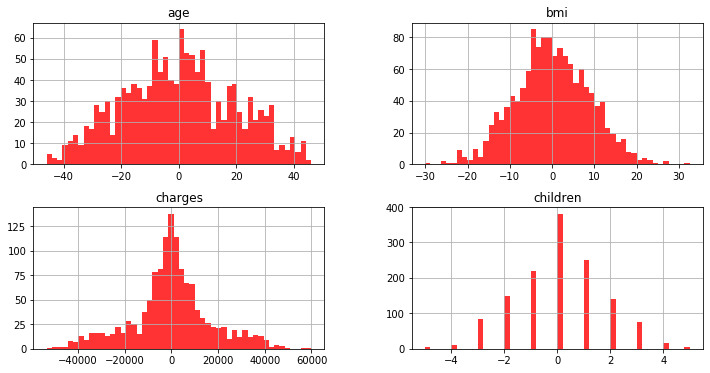

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure();

df[['age', 'bmi', 'children', 'charges']].diff().hist(color="r", alpha=0.8, bins=50, figsize=(12, 6));

Columns children, charges, children, bmi follows fairly normal distribution.

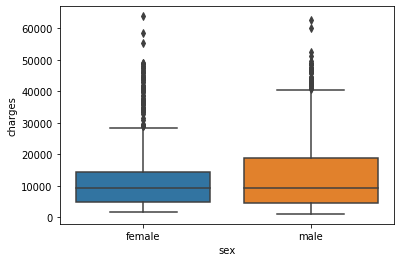

In [14]:
sns.boxplot('sex','charges',data=df)


Median charges for female is 9412.963k dollars, Median charges for male is 9369.616k dollars

The upper fence charges for male is 40.27k dollars which is much higher than the upper fence charges for female which is 28.47k dollars

Outliers exist both in male and female charges

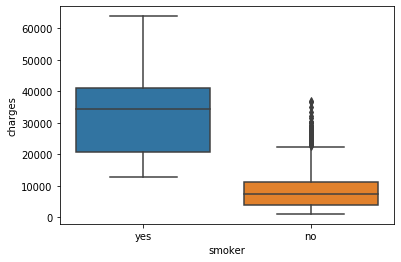

In [13]:
sns.boxplot('smoker','charges',data=df)


Median charges for smoker is significantly high 34.45k dollars, and that of non smoker is 7345.40k dollars

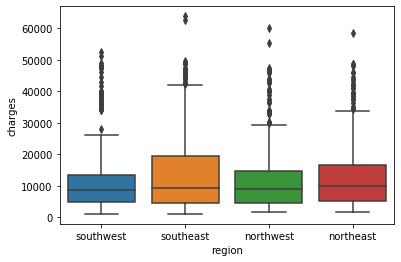

In [12]:
sns.boxplot('region','charges',data=df)


There is no significant visible discrimination in charges based on region.

We need to encode the categoricals.

In [16]:
from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
        
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Spliting and scaling

In [17]:
X= df.drop(['charges'], axis = 1)
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model training & Testing:

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [21]:
lr= LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr)]


Linear Regression : 80 %
K Nearest Neighbours : 80 %
Decision Tree : 90 %
Random Forest : 90 %
AdaBoost : 90 %
Gradient Boosting Regressor : 90 %


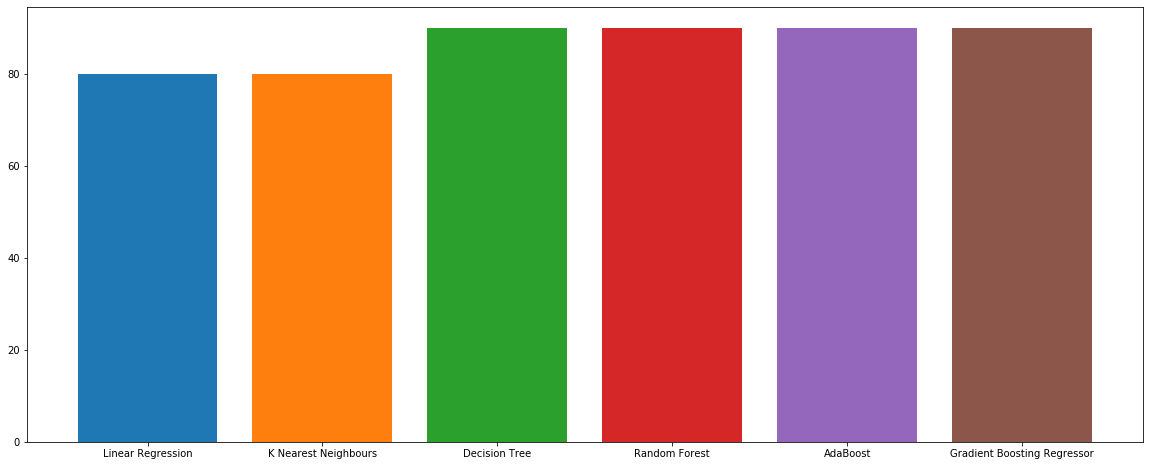

In [22]:
from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
 
    # Fit regressor to the training set
    regressor.fit(X_train, y_train)    
   
    # Predict 
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),1)*100
    

   
    # Evaluate  accuracy on the test set
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)
    

Conclusion:Highest accuracies given by are Gradient Boosting Regressor, AdaBoost, RandomForest, Decision Tree models